<a href="https://colab.research.google.com/github/NajlaZuhir/CRM_Data/blob/main/satsifaction_analysis_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First part uses nlp with manually inputted data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [ ]:
#SAMPLE DATA

crm_data = {
    'CustomerID': [1, 2, 3, 4, 5,6],
    'Feedback': ['The support team was excellent!', 'Product delivery was delayed.', 'Great experience overall.',
                 'Issues were not resolved in a timely manner.', 'Fantastic service!','Not that great.']
}


In [ ]:
crm_df = pd.DataFrame(crm_data)

# Perform sentiment analysis
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\parva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#crm_df['Sentiment_Score'] = crm_df['Feedback'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiments based on scores
#crm_df['Sentiment'] = crm_df['Sentiment_Score'].apply(lambda score: 'Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral')

In [ ]:
crm_df

,CustomerID,Feedback,Sentiment_Score,Sentiment
0,1,The support team was excellent!,0.7712,Positive
1,2,Product delivery was delayed.,-0.2263,Negative
2,3,Great experience overall.,0.6249,Positive
3,4,Issues were not resolved in a timely manner.,-0.1326,Neutral
4,5,Fantastic service!,0.5983,Neutral
5,6,Not that great.,-0.5096,Negative


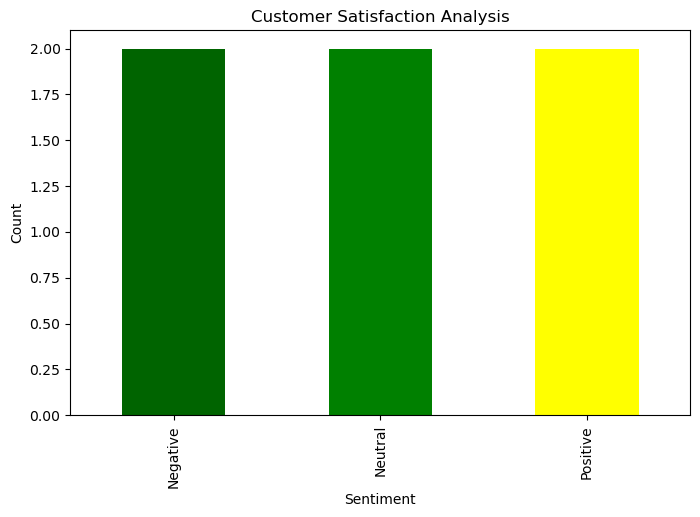

In [ ]:
crm_df['Sentiment_Score'] = crm_df['Feedback'].apply(lambda x: sid.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score >= 0.8:
        return 'Very Positive'
    elif 0.6 <= score < 0.8:
        return 'Positive'
    elif -0.2 <= score < 0.6:
        return 'Neutral'
    elif -0.6 <= score < -0.2:
        return 'Negative'
    else:
        return 'Very Negative'

crm_df['Sentiment'] = crm_df['Sentiment_Score'].apply(classify_sentiment)


plt.figure(figsize=(8, 5))
crm_df['Sentiment'].value_counts().sort_index().plot(kind='bar', color=['darkgreen', 'green', 'yellow', 'red', 'darkred'])
plt.title('Customer Satisfaction Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
crm_df

,CustomerID,Feedback,Sentiment_Score,Sentiment
0,1,The support team was excellent!,0.7712,Positive
1,2,Product delivery was delayed.,-0.2263,Negative
2,3,Great experience overall.,0.6249,Positive
3,4,Issues were not resolved in a timely manner.,-0.1326,Neutral
4,5,Fantastic service!,0.5983,Neutral
5,6,Not that great.,-0.5096,Negative


In [ ]:
positive_count = crm_df['Sentiment'].value_counts().get('Positive', 0)
neutral_count = crm_df['Sentiment'].value_counts().get('Neutral', 0)
negative_count = crm_df['Sentiment'].value_counts().get('Negative', 0)

print(f'Number of Positive rewiews: {positive_count}')
print(f'Number of Neutral reviews: {neutral_count}')
print(f'Number of Negative reviews: {negative_count}')

Number of Positive rewiews: 2
Number of Neutral reviews: 2
Number of Negative reviews: 2


From the above, we have managed to classify each comment/feedback as positive or negative and give a count of the number of people who are satsified/not satisfied.

# Using our fake data

### I added an extra column - Rating_Words which includes fake worded customer reviews instead of numerical ratings.

In [ ]:
df_1 = pd.read_csv("generated_data.csv")

In [ ]:
df_1

,Tourist_ID,Reservation_ID,passport_number,Name,Age,Gender,phone_number,Nationality,arrival_nationality,family_size,...,Num_of_Visits,Days_of_Stay,Random_Event_Type,Room_Preferences,Hotel_Type,Location,Subscribed_to_Loyalty_Program,Rating_of_Services,Total_Spendings,Rating_Words
0,1000,1,105443069,Robert Mcintyre,70,Female,(985)537-0066x8141,Togo,Americans,6,...,5,42,Football event,Double,Mid-Range,Doha,False,2,29588,Not that great. The software lacks some essent...
1,1000,2,911560968,Jason Johnson,77,Male,982.503.7875x8146,Svalbard & Jan Mayen Islands,Americans,8,...,1,19,Exhibition,Single,Luxury,Al Khor,False,5,21766,"Product delivery was delayed, and it affected ..."
2,1000,3,394923841,Kevin Ballard,27,Female,(868)261-0334x5166,Finland,Other Asia inc. Oceania,7,...,2,15,Football event,Suite,Mid-Range,Al Wakrah,True,2,17363,Impressed with the quick resolution of our CRM...
3,1000,4,264506763,Maurice Schultz,67,Female,266-709-9199,Ghana,Europe,7,...,6,15,Marathon,Double,Luxury,Al Wakrah,False,4,17941,Terrible experience with the CRM software; con...
4,1000,5,359610938,Robert Wu,71,Male,893.604.5932x98187,Uzbekistan,Europe,4,...,4,26,Doha Tour,Suite,Budget,Al Rayyan,True,5,19751,Could be better. The CRM interface is a bit co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1000,4996,207659733,Kara Smith,35,Female,(727)473-9868,Madagascar,GCC,6,...,1,53,Exhibition,Single,Luxury,Umm Salal Mohammed,True,4,3767,The support team was quick to respond and very...
4996,1000,4997,460969617,John Palmer,77,Male,463.957.6587,Liberia,Americans,1,...,1,44,Other,Single,Mid-Range,Al Wakrah,False,5,4096,Terrible experience with the CRM software; con...
4997,1000,4998,656437498,Marcus Johnson,30,Male,+1-937-660-9530x8771,Sweden,Americans,1,...,3,29,Marathon,Suite,Mid-Range,Al Wakrah,False,5,11109,The CRM system is a game-changer for our sales...
4998,1000,4999,120286808,Michelle Nichols,28,Male,001-524-801-9012,Peru,Other Africa,7,...,4,9,Festival,Suite,Mid-Range,Umm Salal Mohammed,True,2,12216,The CRM system is a game-changer for our sales...


In [ ]:
df_1['SentimentScore'] = df_1['Rating_Words'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
df_1

,Tourist_ID,Reservation_ID,passport_number,Name,Age,Gender,phone_number,Nationality,arrival_nationality,family_size,...,Days_of_Stay,Random_Event_Type,Room_Preferences,Hotel_Type,Location,Subscribed_to_Loyalty_Program,Rating_of_Services,Total_Spendings,Rating_Words,SentimentScore
0,1000,1,105443069,Robert Mcintyre,70,Female,(985)537-0066x8141,Togo,Americans,6,...,42,Football event,Double,Mid-Range,Doha,False,2,29588,Not that great. The software lacks some essent...,-0.5096
1,1000,2,911560968,Jason Johnson,77,Male,982.503.7875x8146,Svalbard & Jan Mayen Islands,Americans,8,...,19,Exhibition,Single,Luxury,Al Khor,False,5,21766,"Product delivery was delayed, and it affected ...",-0.3612
2,1000,3,394923841,Kevin Ballard,27,Female,(868)261-0334x5166,Finland,Other Asia inc. Oceania,7,...,15,Football event,Suite,Mid-Range,Al Wakrah,True,2,17363,Impressed with the quick resolution of our CRM...,0.1027
3,1000,4,264506763,Maurice Schultz,67,Female,266-709-9199,Ghana,Europe,7,...,15,Marathon,Double,Luxury,Al Wakrah,False,4,17941,Terrible experience with the CRM software; con...,-0.4767
4,1000,5,359610938,Robert Wu,71,Male,893.604.5932x98187,Uzbekistan,Europe,4,...,26,Doha Tour,Suite,Budget,Al Rayyan,True,5,19751,Could be better. The CRM interface is a bit co...,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1000,4996,207659733,Kara Smith,35,Female,(727)473-9868,Madagascar,GCC,6,...,53,Exhibition,Single,Luxury,Umm Salal Mohammed,True,4,3767,The support team was quick to respond and very...,0.7257
4996,1000,4997,460969617,John Palmer,77,Male,463.957.6587,Liberia,Americans,1,...,44,Other,Single,Mid-Range,Al Wakrah,False,5,4096,Terrible experience with the CRM software; con...,-0.4767
4997,1000,4998,656437498,Marcus Johnson,30,Male,+1-937-660-9530x8771,Sweden,Americans,1,...,29,Marathon,Suite,Mid-Range,Al Wakrah,False,5,11109,The CRM system is a game-changer for our sales...,0.0000
4998,1000,4999,120286808,Michelle Nichols,28,Male,001-524-801-9012,Peru,Other Africa,7,...,9,Festival,Suite,Mid-Range,Umm Salal Mohammed,True,2,12216,The CRM system is a game-changer for our sales...,0.0000


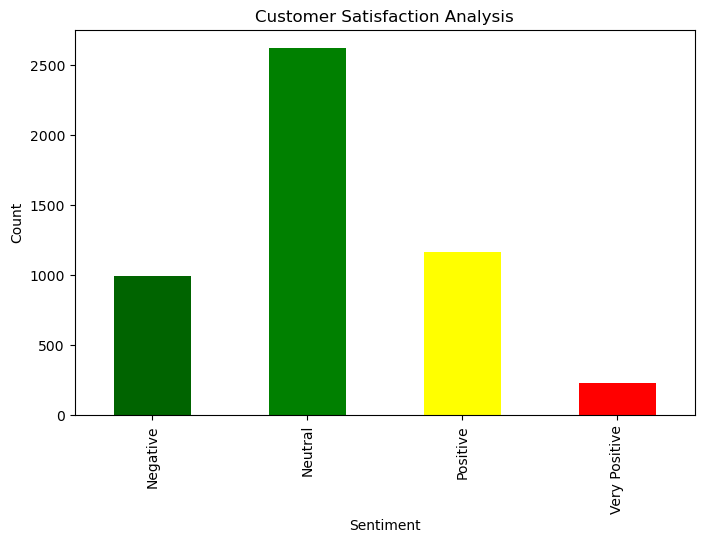

In [ ]:
def classify_sentiment(score):
    if score >= 0.8:
        return 'Very Positive'
    elif 0.6 <= score < 0.8:
        return 'Positive'
    elif -0.2 <= score < 0.6:
        return 'Neutral'
    elif -0.6 <= score < -0.2:
        return 'Negative'
    else:
        return 'Very Negative'

df_1['Sentiment'] = df_1['SentimentScore'].apply(classify_sentiment)


plt.figure(figsize=(8, 5))
df_1['Sentiment'].value_counts().sort_index().plot(kind='bar', color=['darkgreen', 'green', 'yellow', 'red', 'darkred'])
plt.title('Customer Satisfaction Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Continue - for straightforward numerical data - just mapping.


In [ ]:
df = pd.read_csv("generated_data.csv")

In [ ]:
df

,ID,Name,Age,Gender,Nationality,Occupation,Hobby,Family_Members,Modes_of_Travel,Frequency_of_Travel,...,Hotel_Type,Location,Num_of_Visits,Best_Attraction,Random_Event_Type,Cuisine,Subscribed_to_Loyalty_Program,Rating_of_Services,Days_of_Stay,Total_Spendings
0,1001,Mitchell Andrews,36,Female,Dominican Republic,Business Owner,Painting,4,Land,Frequent,...,Budget,Al Daayen,4,Museum of Islamic Art,Championship event,Arabic,False,4,19,3016
1,1002,Jacqueline Hicks,43,Female,Albania,Teacher,Swimming,5,Land,Rare,...,Mid-Range,Madinat ash Shamal,4,Qatar National Museum,Doha Expo,Chinese,False,4,25,25637
2,1003,Stephanie Murray,25,Male,Russian Federation,Engineer,Hiking,6,Air,Frequent,...,Budget,Al Khor,3,Doha Corniche,Championship event,Arabic,True,3,55,3934
3,1004,Christopher Davis,77,Male,Hong Kong,Nurse,Gardening,5,Land,Frequent,...,Luxury,Al Khor,7,Doha Corniche,Doha Expo,Other,False,5,20,29157
4,1005,Wanda Jones,40,Male,Slovenia,Teacher,Gardening,8,Air,Rare,...,Budget,Al Daayen,5,Doha Corniche,Football event,Japanese,False,2,49,4422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,Brian Cannon,78,Male,Gabon,Nurse,Hiking,6,Land,Occasional,...,Luxury,Doha,5,Other,Championship event,Thai,False,4,43,10907
996,1997,Jacqueline Thompson,36,Female,Guernsey,Other,Reading,10,Air,Rare,...,Budget,Al Rayyan,4,Doha Corniche,Football event,Other,True,3,41,17729
997,1998,Paul Colon,32,Male,San Marino,Teacher,Playing musical instruments,1,Air,Rare,...,Mid-Range,Madinat ash Shamal,6,Doha Corniche,Football event,Arabic,False,4,41,26536
998,1999,Daniel Bell,74,Female,Saint Lucia,Doctor,Photography,7,Sea,Frequent,...,Budget,Doha,5,Katara Beach,Festival,Indian,True,3,11,28945


In [ ]:
lower_threshold = 2
upper_threshold = 4

df['Sentiment'] = pd.cut(df['Rating_of_Services'], bins=[-float('inf'), lower_threshold, upper_threshold, float('inf')],
                         labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)

In [ ]:
print("Mapped Data:")
df

Mapped Data:


,ID,Name,Age,Gender,Nationality,Occupation,Hobby,Family_Members,Modes_of_Travel,Frequency_of_Travel,...,Location,Num_of_Visits,Best_Attraction,Random_Event_Type,Cuisine,Subscribed_to_Loyalty_Program,Rating_of_Services,Days_of_Stay,Total_Spendings,Sentiment
0,1001,Mitchell Andrews,36,Female,Dominican Republic,Business Owner,Painting,4,Land,Frequent,...,Al Daayen,4,Museum of Islamic Art,Championship event,Arabic,False,4,19,3016,Neutral
1,1002,Jacqueline Hicks,43,Female,Albania,Teacher,Swimming,5,Land,Rare,...,Madinat ash Shamal,4,Qatar National Museum,Doha Expo,Chinese,False,4,25,25637,Neutral
2,1003,Stephanie Murray,25,Male,Russian Federation,Engineer,Hiking,6,Air,Frequent,...,Al Khor,3,Doha Corniche,Championship event,Arabic,True,3,55,3934,Neutral
3,1004,Christopher Davis,77,Male,Hong Kong,Nurse,Gardening,5,Land,Frequent,...,Al Khor,7,Doha Corniche,Doha Expo,Other,False,5,20,29157,Positive
4,1005,Wanda Jones,40,Male,Slovenia,Teacher,Gardening,8,Air,Rare,...,Al Daayen,5,Doha Corniche,Football event,Japanese,False,2,49,4422,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,Brian Cannon,78,Male,Gabon,Nurse,Hiking,6,Land,Occasional,...,Doha,5,Other,Championship event,Thai,False,4,43,10907,Neutral
996,1997,Jacqueline Thompson,36,Female,Guernsey,Other,Reading,10,Air,Rare,...,Al Rayyan,4,Doha Corniche,Football event,Other,True,3,41,17729,Neutral
997,1998,Paul Colon,32,Male,San Marino,Teacher,Playing musical instruments,1,Air,Rare,...,Madinat ash Shamal,6,Doha Corniche,Football event,Arabic,False,4,41,26536,Neutral
998,1999,Daniel Bell,74,Female,Saint Lucia,Doctor,Photography,7,Sea,Frequent,...,Doha,5,Katara Beach,Festival,Indian,True,3,11,28945,Neutral


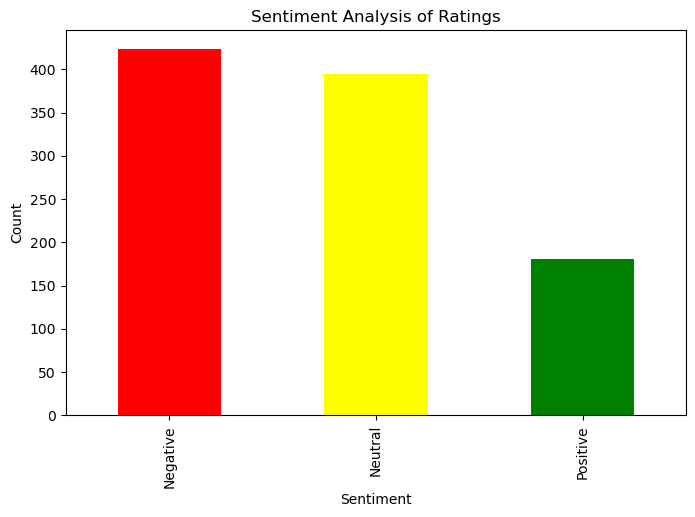

In [ ]:
# Plotting
sentiment_counts = df['Sentiment'].value_counts().sort_index()
colors = ['red', 'yellow', 'green']

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Analysis of Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()